In [1]:
!pip install -q opendatasets

import pandas as pd
import opendatasets  as od

In [2]:
od.download('https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aszadrakin
Your Kaggle Key: ··········


100%|██████████| 66.0M/66.0M [00:00<00:00, 141MB/s]


In [3]:
data = pd.read_csv('/content/creditcardfraud/creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
for col in data.columns :
   print(f"{col} : {data[col].unique()}")

Time : [0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]
V1 : [-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]
V2 : [-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]
V3 : [ 2.53634674  0.16648011  1.77320934 ... -3.24963981  0.70251023
  0.70333737]
V4 : [ 1.37815522  0.44815408  0.37977959 ... -0.55782812  0.68979917
 -0.50627124]
V5 : [-0.33832077  0.06001765 -0.50319813 ...  2.63051512 -0.37796113
 -0.01254568]
V6 : [ 0.46238778 -0.08236081  1.80049938 ...  3.0312601   0.62370772
 -0.64961669]
V7 : [ 0.23959855 -0.07880298  0.79146096 ... -0.29682653 -0.68617999
  1.57700625]
V8 : [ 0.0986979   0.08510165  0.24767579 ...  0.70841718  0.67914546
 -0.41465041]
V9 : [ 0.36378697 -0.25542513 -1.51465432 ...  0.43245405  0.39208671
  0.48617951]
V10 : [ 0.09079417 -0.16697441  0.20764287 ... -0.48478176 -0.39912565
 -0.91542665]
V11 : [-0.55159953  1.61272666  0.62450146 ...  0.41161374 -1.93384882
 -

In [7]:
binary_category_features = ['Class'] #,
numerical_features = ['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12', 'V13','V14','V15','V16','V17','V18','V19','V20','V21','V22', 'V23', 'V24','V25','V26','V27','V28','Amount']


In [8]:
from sklearn.preprocessing import LabelEncoder

def label_encoder_(df, label_features):
  label_imapper = dict()
  le = LabelEncoder()
  for feature in label_features:
    df[feature] = le.fit_transform(df[feature])
    label_imapper[feature] = dict(zip(le.transform(le.classes_),le.classes_))
  return label_imapper

In [9]:
from sklearn.preprocessing import OneHotEncoder

def onehot_encoder_(df, class_features):
  oe = OneHotEncoder()
  for feature in class_features:
    encoded = oe.fit_transform(df[[feature]])
    encoded_df = pd.DataFrame(encoded.toarray(), columns=oe.get_feature_names_out([feature]))
    df = pd.concat([df, encoded_df], axis=1).drop(feature, axis=1)
  # print(df.head())
  return df

In [10]:
from sklearn.preprocessing import StandardScaler

def normalizer_(df, numerical_features):
  normalizers = dict()

  for feature in numerical_features:
    scaler = StandardScaler()
    df[feature] = scaler.fit_transform(df[[feature]])
    normalizers[feature] = scaler
  return normalizers

<Axes: ylabel='Class'>

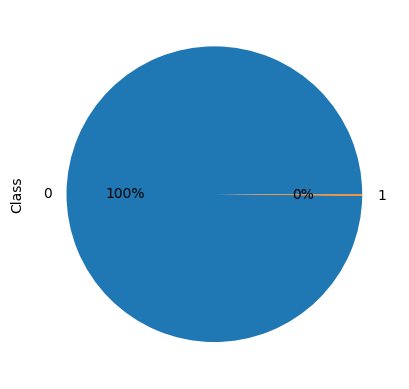

In [11]:
data["Class"].value_counts().plot(kind="pie",autopct='%1.0f%%')

**Upsampling Needed**

len(data_majority)=284315
len(data_minority)=492


<Axes: ylabel='Class'>

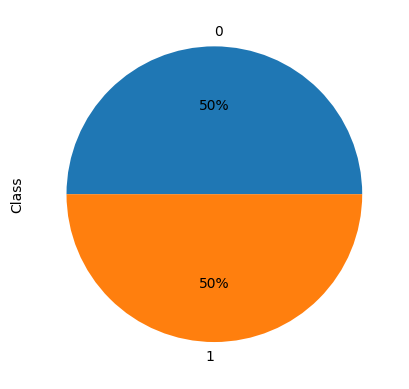

In [13]:
from sklearn.utils import resample

data_majority = data[data['Class'] == 0]
data_minority = data[data['Class'] == 1]

print(f"{len(data_majority)=}")
print(f"{len(data_minority)=}")

data_majority_sampled = resample(data_majority, replace=True, n_samples=10000, random_state=5)
data_minority_sampled = resample(data_minority, replace=True, n_samples=10000, random_state=5)

data_balanced = pd.concat([data_majority_sampled, data_minority_sampled])

data_balanced["Class"].value_counts().plot(kind="pie",autopct='%1.0f%%')

In [14]:
from sklearn.model_selection import train_test_split

y = data_balanced['Class']
X = data_balanced.drop('Class',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
len(X_test) == len(y_test)

True

**Normalize Numerical Features**

In [15]:
normalizers = normalizer_(X_train, numerical_features)

In [16]:
for feature in numerical_features:
  X_test[feature] = normalizers[feature].transform(X_test[[feature]])

In [ ]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
108293,-0.352178,0.663335,-0.470038,0.383400,-0.727124,0.883786,2.310054,0.393719,0.108491,0.520931,...,-0.176780,-0.164987,-0.372836,-0.032195,1.837888,1.012177,-0.941824,-0.059581,-0.042698,-0.393582
106679,-0.368148,0.350641,-0.181336,0.044712,0.305415,-0.109513,-0.525412,-0.043060,0.099092,-0.221155,...,0.638981,0.142963,-0.239708,-0.270774,0.505693,0.870854,-0.715326,0.673267,0.935342,0.483724
160006,0.524909,0.806226,-0.548758,0.319846,-0.646179,0.375649,-0.107960,0.468706,-0.080638,1.051505,...,-0.528373,-0.043265,0.598797,0.055566,1.200068,0.344177,-0.972691,-0.094054,-0.204030,-0.414378
183721,0.791762,0.821562,-0.932944,0.416655,-1.288834,0.203086,1.072951,0.193303,0.030158,0.058369,...,-0.664576,-0.149693,0.335845,0.235864,-2.864273,-0.724073,-0.183704,-0.016746,-0.249091,-0.369136
45203,-0.945964,-0.027190,0.077369,-0.232136,1.309230,1.127163,-1.344523,0.442055,-0.136306,-1.017551,...,-0.314209,-0.117643,0.181131,0.828799,-0.421486,1.695715,1.335121,0.365586,-0.986339,-0.414378


**Information Gain**

In [17]:
import pandas as pd
import numpy as np

def calculate_entropy(labels):
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    probabilities = label_counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_information_gain(data, feature_name, target_name):
    total_entropy = calculate_entropy(data[target_name])

    unique_values = data[feature_name].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature_name] == value]
        subset_weight = len(subset) / len(data)
        subset_entropy = calculate_entropy(subset[target_name])
        weighted_entropy += subset_weight * subset_entropy

    information_gain = total_entropy - weighted_entropy
    return information_gain


In [18]:
information_gain_feature = dict()
for feature in X_train.columns:
  information_gain_feature[feature] = calculate_information_gain(pd.concat([X_train, y_train], axis=1), feature, 'Class')
#print(f"Info gain on {feature}: {information_gain_feature[feature]}")

In [19]:
sorted_dict_asc = dict(sorted(information_gain_feature.items(), key=lambda item: item[1], reverse=True))
sorted_dict_asc

{'V1': 0.9999552647202896,
 'V2': 0.9999552647202896,
 'V3': 0.9999552647202896,
 'V4': 0.9999552647202896,
 'V5': 0.9999552647202896,
 'V6': 0.9999552647202896,
 'V7': 0.9999552647202896,
 'V8': 0.9999552647202896,
 'V9': 0.9999552647202896,
 'V10': 0.9999552647202896,
 'V11': 0.9999552647202896,
 'V12': 0.9999552647202896,
 'V13': 0.9999552647202896,
 'V14': 0.9999552647202896,
 'V15': 0.9999552647202896,
 'V16': 0.9999552647202896,
 'V17': 0.9999552647202896,
 'V18': 0.9999552647202896,
 'V19': 0.9999552647202896,
 'V20': 0.9999552647202896,
 'V21': 0.9999552647202896,
 'V22': 0.9999552647202896,
 'V23': 0.9999552647202896,
 'V24': 0.9999552647202896,
 'V25': 0.9999552647202896,
 'V26': 0.9999552647202896,
 'V27': 0.9999552647202896,
 'V28': 0.9999552647202896,
 'Time': 0.995143315067126,
 'Amount': 0.765560775712449}

In [20]:
list(sorted_dict_asc.keys())

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Time',
 'Amount']

In [21]:
k = 40
top_k_features = list(sorted_dict_asc.keys())[:k]
top_k_features

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Time',
 'Amount']

In [22]:
X_train_top_k = X_train[top_k_features]
X_test_top_k = X_test[top_k_features]

***Logistic Regression***

In [23]:
class LogisticRegression:
    def __init__(self, error_thres=0.5, learning_rate=0.01, n_iters=1000):
        self.error_thres = error_thres
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            err = np.mean((y_predicted-y) ** 2) # MSE
            if err < self.error_thres :
              break

            dw = np.dot(X.T, (y_predicted - y))
            # dw = dw / np.linalg.norm(dw)
            # db = (1 / n_samples) * np.sum(y_predicted - y)
            db = np.sum(y_predicted-y)
            # db = db / np.linalg.norm(db)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db



        # print(f"{X.T=}")
        # print(f"{np.dot(X.T,(y_predicted-y))}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy


In [25]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

regressor = LogisticRegression(error_thres=0.1)
regressor.fit(X_train_top_k, y_train)
y_pred = regressor.predict(X_test_top_k)

cm = confusion_matrix(y_test, y_pred)


# True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
true_positive_rate = TP / (TP + FN)
true_negative_rate = TN / (TN + FP)
positive_predictive_value = TP / (TP + FP)
false_discovery_rate = FP / (TP + FP)
f1 = f1_score(y_test, y_pred)


print("LR classification accuracy:", accuracy)
print(f'True Positive Rate: {true_positive_rate:.2f}')
print(f'True Negative Rate: {true_negative_rate:.2f}')
print(f'Positive Predictive Value: {positive_predictive_value:.2f}')
print(f'False Discovery Rate: {false_discovery_rate:.2f}')
print(f'F1 Score: {f1:.2f}')



LR classification accuracy: 0.90125
True Positive Rate: 0.81
True Negative Rate: 1.00
Positive Predictive Value: 1.00
False Discovery Rate: 0.00
F1 Score: 0.89


<ipython-input-23-dfa930f64679>:44: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


***AdaBoost***

In [27]:
import copy
class AdaBoostClassifier:
    def __init__(self, base_estimator, k=50):
        self.k = k
        self.base_estimator = base_estimator
        self.w = []
        self.z = []
        self.models = []
        self.epsilon = 1e-10


    def resample(self,X,y):
      n = len(X)
      # for _ in range(n):
      print(self.w)
      indices = np.random.choice(len(X), size=len(X), replace=True, p=self.w)

      return X.iloc[indices], y.iloc[indices]

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.ones(n_samples) / n_samples  # Initialize weights uniformly

        for _ in range(self.k):
            indices = np.random.choice(len(X),size=len(X), replace=True, p=self.w)
            X_ = X.iloc[indices]
            y_ = y.iloc[indices]

            model = copy.deepcopy(self.base_estimator)
            model.fit(X_, y_)

            y_pred = model.predict(X)

            error = np.sum(self.w * (y_pred != y))
            # print(error)
            # if error > 0.5 :
            #   continue
            # print("here")
            error = max(error,self.epsilon)

            matching_predictions = (y_pred == y)  # Find where predictions match y
            self.w[matching_predictions] *= error / (1 - error)
            self.w /= np.sum(self.w)


            z_ = 0.5 * np.log((1.0 - error) / error)

            # w = w * np.exp(-z_ * y_ * y_pred)
            # w /= np.sum(w)
            self.z.append(z_)
            self.models.append(model)
        print(f"{self.models}")

    def predict(self, X):
        final_predictions = np.zeros(len(X))
        print(len(self.models))
        for z_, model in zip(self.z, self.models):
            predictions = z_ * np.array(model.predict(X))
            final_predictions += predictions
        print(f"{final_predictions=}")
        print(f"{final_predictions.shape}")
        y_predicted_cls = [1 if i > 0.5 else 0 for i in final_predictions]
        return np.array(y_predicted_cls)



In [32]:
from sklearn.metrics import accuracy_score
regressor = LogisticRegression(error_thres=0.5)
adaboost_classifier = AdaBoostClassifier(base_estimator=regressor,k=20)

adaboost_classifier.fit(X_train_top_k, y_train)

y_pred = adaboost_classifier.predict(X_test_top_k)

print(y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.4f}")

[<__main__.LogisticRegression object at 0x7f4b6ef539a0>, <__main__.LogisticRegression object at 0x7f4b6ef51000>, <__main__.LogisticRegression object at 0x7f4b6fa8b1c0>, <__main__.LogisticRegression object at 0x7f4b6ef51ed0>, <__main__.LogisticRegression object at 0x7f4b6ef52560>, <__main__.LogisticRegression object at 0x7f4b6ef513c0>, <__main__.LogisticRegression object at 0x7f4b6ef50070>, <__main__.LogisticRegression object at 0x7f4b6ef511e0>, <__main__.LogisticRegression object at 0x7f4b6ef50e20>, <__main__.LogisticRegression object at 0x7f4b6ef52b00>, <__main__.LogisticRegression object at 0x7f4b6ef52f80>, <__main__.LogisticRegression object at 0x7f4b6ef51e10>, <__main__.LogisticRegression object at 0x7f4b6ef519f0>, <__main__.LogisticRegression object at 0x7f4b6ef511b0>, <__main__.LogisticRegression object at 0x7f4b6ef53010>, <__main__.LogisticRegression object at 0x7f4b6ef520e0>, <__main__.LogisticRegression object at 0x7f4b6ef52e30>, <__main__.LogisticRegression object at 0x7f4b6e